# **OpenFASoC: Design of Analog Comparator with Open Source Tool**

```
OpenFASOC Team, November 2024
SPDX-License-Identifier: Apache-2.0
```


|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Yongjin Kwon|Handong Global University|No|No|
|Jinhyeong Jung (wjdwlsgud99@gmail.com)|Handong Global University|No|No|
|Mijeong Kwon(kmjmj929@gmail.com)|Handong Global University|No|No|


# Abstract

This notebook describes the Analog Comparator, which is one of the modules that make up the Successive Approximation Register-Analog Digital Converter(SAR-ADC). The comparator is designed for an 7-bit SAR ADC operating with a 1.8V bias voltage. It aims to compare a minimum differential input of 7.03mV, which corresponds to half the least significant bit (LSB) of 14.06mV. The comparator achieves an accuracy of 7.03mV in operation.

# Introduction

The Strong Arm Latch Comparator is a type of high-speed and low-power analog comparator that is widely used, especially in ADC design. It is a dynamic comparator that operates on clock signals.

The StrongArm Latch Comparator has three main characteristics.
The first is the fast comparison speed. It can be used efficiently for converters such as SAR-ADC because it can operate at high speeds.
The second is low power consumption. It consumes energy only during the comparison process and uses very little power for the rest of the time, reducing power consumption.
The last is the Latch feature, which includes the ability to maintain comparison results.

The comparator operates in two stages: the Pre-Charge and Regeneration.
Pre-Charge stage is when the clock is Low, and the comparator's output is initialized to the VDD.
When the regeneration stage is when the clock is high, the output is determined by the difference in the input analog signal. In the case of SAR-ADC, it outputs it compared to the value stored in the DAC. It outputs quickly as digital signals 0 and 1 through positive feedback.


# Architecture

The following is the comparator circuit designed as part of this work.


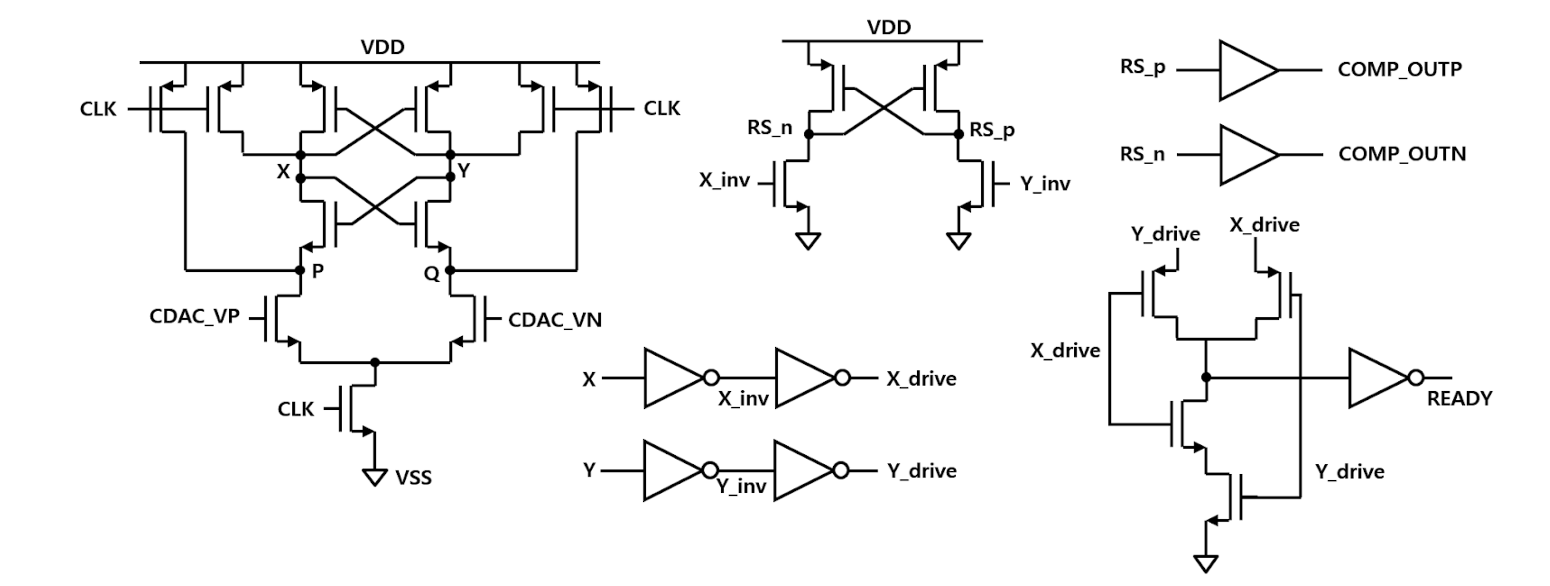

Figure 1. Schematic of Designed Comparator

The comparator we designed has 5 inputs: VDD, VSS, cdac_vp, cdac_vn, and CLK.
VDD and VSS are power ports. cdac_vp and cdac_vn are ports for two inputs to compare. CLK inputs a clock signal. The reason why the names cdac_vp and cdac_vn were designed on the assumption that they were used in SAR_ADC, so they were output from CDAC and entered as input to the comparator.

There are 3 outputs: comp_outp, comp_outn, and ready.
comp_outp and comp_outn are the sections that output the comparator's output, which are digital signals 0 and 1. ready outputs the clock signal of the SAR logic of the SAR-ADC through XNOR.

Specifically, the comparator we designed included the internal label. The internal labels are X, Y, P, Q, X_inv, Y_inv, X_drive, Y_drive, RS_p, and RS_n.
X and Y are pure outputs of the comparator. X_inv and Y_inv are values where X and Y have passed through the inverter, and when the values of X_inv and Y_inv pass through the inverter once more, X_drive and Y_drive are output.

P and Q are the voltages of the drain node of the input MOSFET, and it can be considered that comparison is possible due to the difference between the two voltages.

In addition, RS_p and RS_n are output values of RS Latch with X_inv and Y_inv as inputs, and the values are stored through this. X_drive and Y_drive are used to obtain an output called ready as an input of XNOR.


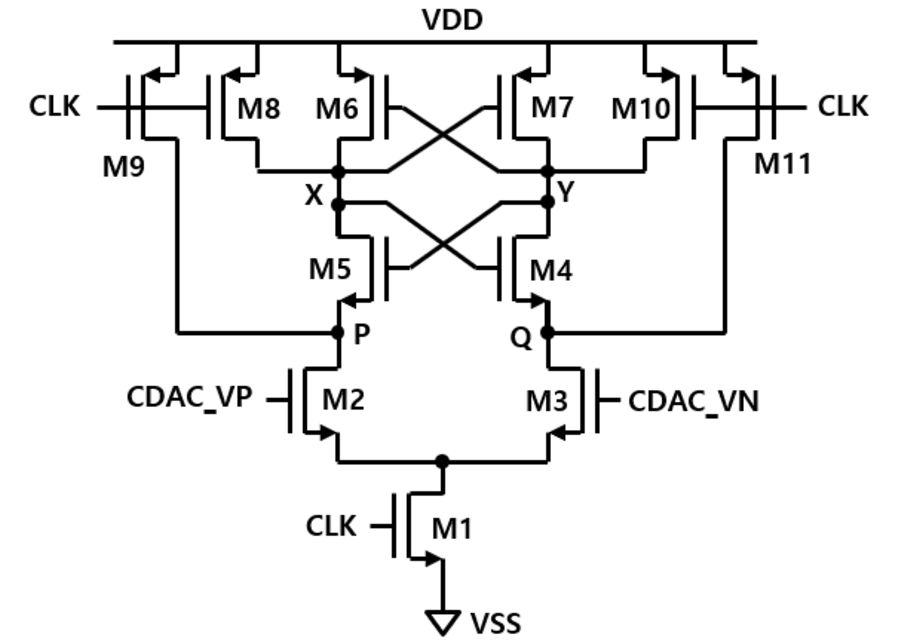

Figure 2. Schematic of Strong Arm Latch

When CLK is 0, M8-M11 operates and precharges nodes P, Q, X, and Y to a state of high. P and Q have the same capacitance, and X and Y have the same capacitance.
As soon as CLK reaches 1, M2 and M3 operate. This behavior causes the values of X and Y to drop until M6 and M7 are activated. One of the values of X and Y is 1 and one is 0 output. At this time, M4 and M5 play a role in preventing the connection between the VDD and the VSS while the output is determined.
When this action determines the values of X and Y, it works by saving them through RS Latch. The waveform can be seen in Figure 4.


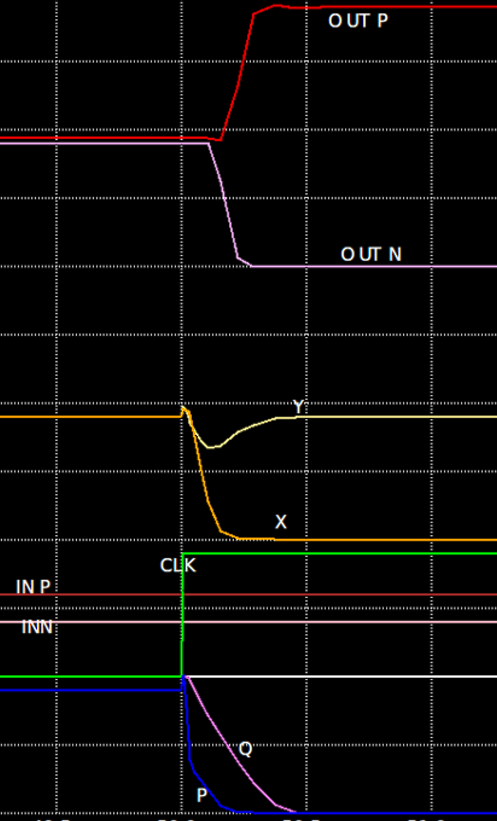

Figure 3. Waveform of Comparator

The situation below was simulated to have a higher INP(=CDAC_VP). When CLK is 0, nodes X, Y, P and Q can be seen that they are precharged.

As soon as CLK rises to 1, the INP is larger, so M2 operates faster than M3. As a result, the P value drops faster, and since the X and Y nodes are precharged, M4 and M5 are in the ON state, the X value drops along with P. As a result, M7 operates to charge the Y node. Therefore, X has an output of 0, and Y has an output of 1.


# Design Flow

The comparator is generated from the following steps.

1. Design schematic using xscheme tool
2. Extract schematic SPICE file
3. Draw layout and check DRC using Magic
4. Extract GDS and SPICE with magic.
5. Run LVS check with netgen
6. Simulation SPICE file using python

# Environment Setting

In [ ]:
import os

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - cairosvg
  - pyspice
  - open_pdks.sky130a
  - magic
  - gdstk
  - ngspice
  - iverilog
  - bison
  - pip
  - pip:
    - gdspy
    - pyyaml
    - cairosvg
    - pyverilog

Writing environment.yml


In [ ]:
!mamba env update -n base -f environment.yml

[+] 0.0s
[+] 0.1s
litex-hub/linux-64    ⣾  
litex-hub/noarch      ⣾  
conda-forge/linux-64  ⣾  
conda-forge/noarch     1%litex-hub/linux-64                                            No change
litex-hub/noarch                                              No change
[+] 0.2s
conda-forge/linux-64   3%
conda-forge/noarch    20%[+] 0.3s
conda-forge/linux-64  12%
conda-forge/noarch    39%[+] 0.4s
conda-forge/linux-64  20%
conda-forge/noarch    62%[+] 0.5s
conda-forge/linux-64  25%
conda-forge/noarch    68%[+] 0.6s
conda-forge/linux-64  30%
conda-forge/noarch    79%[+] 0.7s
conda-forge/linux-64  33%
conda-forge/noarch    91%conda-forge/noarch                                
[+] 0.8s
conda-forge/linux-64  38%[+] 0.9s
conda-forge/linux-64  50%[+] 1.0s
conda-forge/linux-64  59%[+] 1.1s
conda-forge/linux-64  62%[+] 1.2s
conda-forge/linux-64  70%[+] 1.3s
conda-forge/linux-64  79%[+] 1.4s
conda-forge/linux-64  91%conda-forge/linux-64                              


Looking for: ['cairosvg', 'pyspic

In [ ]:
import os

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  import condacolab
  CONDA_PREFIX = condacolab.PREFIX

# Design schematic using xscheme tool

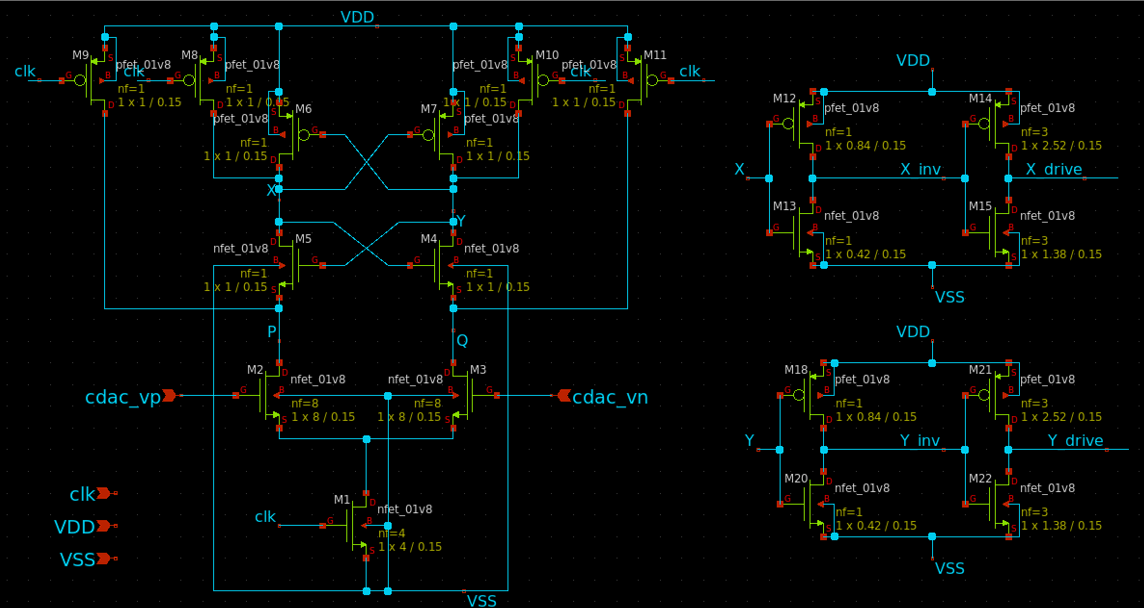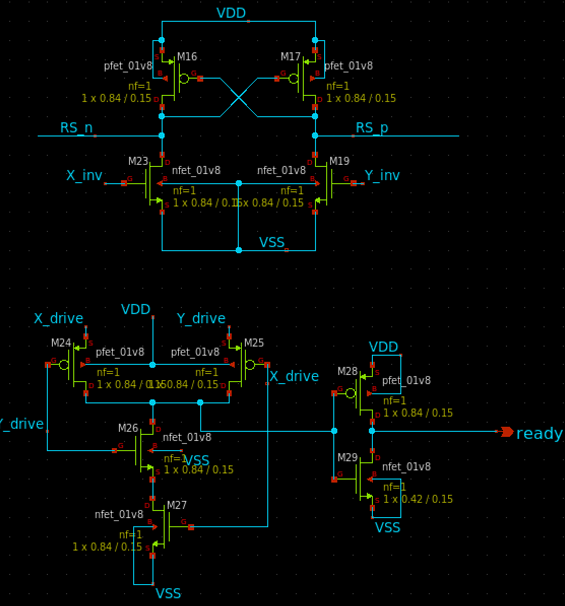

Figure 4. Schematic by Xschem

# Layout using Magic


## Connect github

To get layout SPICE(included RC), schematic SPICE file and TCL file

In [ ]:
%cd /content/
!rm -rf hgu_goss
!git clone https://github.com/RTimothyEdwards/netgen.git
%cd netgen
!./configure
!make
!make install
%cd ../
!git clone https://github.com/midolls/hgu_goss.git
%cd hgu_goss
!git submodule init
!git submodule update --remote


/content
fatal: destination path 'netgen' already exists and is not an empty directory.
/content/netgen
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking target system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking how to run the C preprocessor... gcc -E
checking for library containing strerror... none required
checking for a BSD-compatible install... /usr/bin/install -c
checking for ranlib... ranlib
checking for ld used by GCC... /usr/bin/ld
checking if the linker (/usr/bin/ld) is GNU ld... yes
checking for grep that handles long lines and 

In [ ]:
%cd /content/hgu_goss/mag

/content/hgu_goss/mag


In [ ]:
import sys
sys.path.append("/content/hgu_goss/mag")
print(sys.path)

['/usr/local/lib/python3.10/site-packages', '/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython', '/content/hgu_goss/mag', '/content/hgu_goss/mag']


In [ ]:
%%script bash -c "PDK_ROOT=/usr/local/share/pdk PDKPATH=/usr/local/share/pdk/sky130A magic -dnull -noconsole -rcfile /usr/local/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc"
addpath /content/hgu_goss/mag


Magic 8.3 revision 464 - Compiled on Sat Mar  9 23:18:29 UTC 2024.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.471-0-g97d0844


### Draw the top-level layout

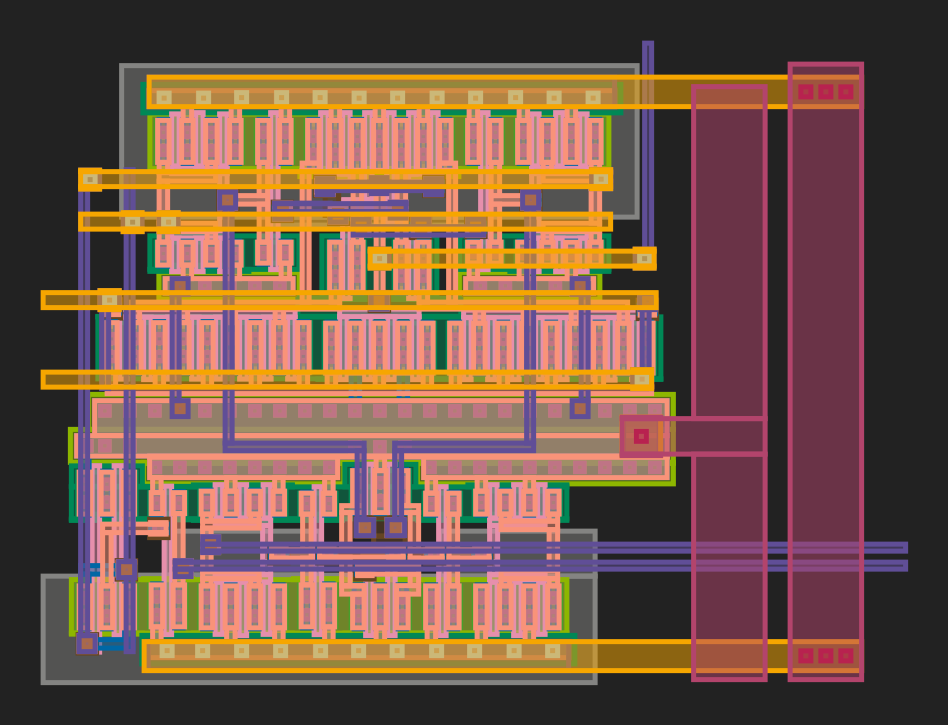

In [ ]:
import gdstk
import cairosvg
from IPython.display import Image


library = gdstk.read_gds('hgu_comp.gds')
#print(library.cells)
top_cells = library.top_level()
top_cells[0].write_svg('hgu_comp.gds.svg')
cairosvg.svg2png(url='hgu_comp.gds.svg', write_to='hgu_comp.gds.png', scale=5)
Image('hgu_comp.gds.png')

# LVS CHECK

In [ ]:
%%script bash -c "netgen -noconsole"
lvs {./lvs/hgu_comp.spice hgu_comp} {./lvs/hgu_comp_flat.spice hgu_comp_flat} TCL_scripts/setup.tcl comp.out
exit

Netgen 1.5.287 compiled on Thu Dec  5 03:50:50 PM UTC 2024
Reading netlist file ./lvs/hgu_comp.spice


Error in SPICE file read: No file ./lvs/hgu_comp.spice
-1


In [ ]:
%cd ../lvs

/content/hgu_goss/lvs


In [ ]:
with open('comp.out', 'r') as f:
    print(f.read())


Circuit 1 cell sky130_fd_pr__nfet_01v8 and Circuit 2 cell sky130_fd_pr__nfet_01v8 are black boxes.

Subcircuit pins:
Circuit 1: sky130_fd_pr__nfet_01v8         |Circuit 2: sky130_fd_pr__nfet_01v8         
-------------------------------------------|-------------------------------------------
1                                          |1                                          
2                                          |2                                          
3                                          |3                                          
4                                          |4                                          
---------------------------------------------------------------------------------------
Cell pin lists are equivalent.
Device classes sky130_fd_pr__nfet_01v8 and sky130_fd_pr__nfet_01v8 are equivalent.

Circuit 1 cell sky130_fd_pr__pfet_01v8 and Circuit 2 cell sky130_fd_pr__pfet_01v8 are black boxes.

Subcircuit pins:
Circuit 1: sky130_fd_pr__pfet_01v8

# Simulations
To see how the final design functions, run simulations.

In [ ]:
%cd /content/hgu_goss/hgu/spice


/content/hgu_goss/hgu/spice


In [ ]:
cat hgu_comp_flat_RC.spice

* NGSPICE file created from hgu_comp_flat.ext - technology: sky130A

.subckt hgu_comp ready cdac_vn comp_outp comp_outn cdac_vp clk VDD VSS P Q a_1566_n378# a_1248_n288#
X0 ready.t0 a_564_n1721# VDD.t38 VDD.t37 sky130_fd_pr__pfet_01v8 ad=0.244 pd=2.26 as=0.244 ps=2.26 w=0.84 l=0.15
X1 a_564_n1721# a_476_n1721# a_564_n1266# VSS.t62 sky130_fd_pr__nfet_01v8 ad=0.244 pd=2.26 as=0.122 ps=1.13 w=0.84 l=0.15
X2 comp_outn.t2 a_1950_n1721# VDD.t18 VDD.t17 sky130_fd_pr__pfet_01v8 ad=0.26 pd=2.3 as=0.139 ps=1.17 w=0.84 l=0.15
X3 Q cdac_vn.t0 a_582_n700# VSS.t65 sky130_fd_pr__nfet_01v8 ad=0.165 pd=1.33 as=0.165 ps=1.33 w=1 l=0.15
X4 a_1950_n1721# RS_n VDD.t10 VDD.t9 sky130_fd_pr__pfet_01v8 ad=0.244 pd=2.26 as=0.244 ps=2.26 w=0.84 l=0.15
X5 a_482_n1818# a_1716_n1348# VSS.t37 VSS.t36 sky130_fd_pr__nfet_01v8 ad=0.0759 pd=0.79 as=0.143 ps=1.54 w=0.46 l=0.15
X6 P cdac_vp.t0 a_582_n700# VSS.t52 sky130_fd_pr__nfet_01v8 ad=0.165 pd=1.33 as=0.165 ps=1.33 w=1 l=0.15
X7 a_564_n1721# a_482_n1818# a_476_n1721#

.title HGU_Comparator
.include /content/hgu_goss/hgu/spice/hgu_comp_flat_RC.spice
.lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt
X1 ready cdac_vn comp_outp comp_outn cdac_vp clk VDD VSS P Q X Y hgu_comp
V1 VDD VSS 1.8
V2 ready VSS 1.8
V3 VSS 0 0
V4 Vbias 0 0.9
C1 comp_outp VSS 0.005pF
C2 comp_outn VSS 0.005pF
Vcdac_vp cdac_vp Vbias PWL(0ns 0V 30ns -0.002V)
Vcdac_vn cdac_vn Vbias PWL(0ns 0V 30ns 0.002V)
Vclk clk 0 DC 0V PULSE(0V 1.8V 1ns 1ps 1ps 1ns 4ns)

done


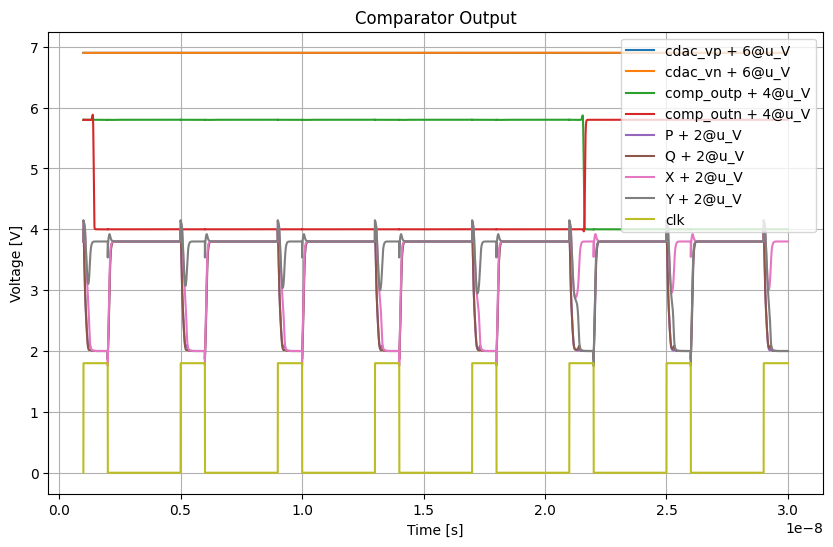

In [ ]:
## Importing the SPICE file of an externally designed component for simulation

from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *
import matplotlib.pyplot as plt

circuit = Circuit('HGU_Comparator')
circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'tt')
circuit.include('hgu_comp_flat_RC.spice')

# circuit.X(1, 'hgu_comp', 'cdac_vn', 'cdac_vp', 'VSS', 'VDD', 'clk', 'ready', 'comp_outp', 'comp_outn')
circuit.X(1, 'hgu_comp', 'ready', 'cdac_vn', 'comp_outp', 'comp_outn', 'cdac_vp', 'clk', 'VDD', 'VSS', 'P', 'Q', 'X', 'Y')

# Define the voltage sources
circuit.V(1, 'VDD', 'VSS', 1.8)
circuit.V(2, 'ready', 'VSS', 1.8)
circuit.V(3, 'VSS', 0, 0)
circuit.V(4, 'Vbias', 0, 0.9)

circuit.C(1, 'comp_outp', 'VSS', 0.005@u_pF)  # 5 fF capacitor
circuit.C(2, 'comp_outn', 'VSS', 0.005@u_pF)  # 5 fF capacitor

# # pulse input source
# circuit.PulseVoltageSource('cdac_vp', 'cdac_vp','Vbias',
#                            initial_value=0@u_V, pulsed_value=0.007@u_pV,
#                            rise_time=10@u_ps, fall_time=10@u_ps,
#                            pulse_width=4@u_ns, period=8@u_ns, delay_time=4@u_ns)
# circuit.PulseVoltageSource('cdac_vn', 'cdac_vn','Vbias',
#                            initial_value=0@u_V, pulsed_value=0.007@u_pV,
#                            rise_time=10@u_ps, fall_time=10@u_ps,
#                            pulse_width=4@u_ns, period=8@u_ns, delay_time=0@u_ns)

### liner input source
circuit.PieceWiseLinearVoltageSource(
    'cdac_vp', 'cdac_vp','Vbias',
    values=[(0@u_ns, 0@u_V), (30@u_ns, -0.002@u_V)],
)
circuit.PieceWiseLinearVoltageSource(
    'cdac_vn', 'cdac_vn','Vbias',
    values=[(0@u_ns, 0@u_V), (30@u_ns, 0.002@u_V)],
)

circuit.PulseVoltageSource('clk', 'clk', 0,
                           initial_value=0@u_V, pulsed_value=1.8@u_V,
                           rise_time=1@u_ps, fall_time=1@u_ps,
                           pulse_width=1@u_ns, period=4@u_ns, delay_time=1@u_ns)

print(str(circuit))

# Run transient simulation
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(start_time=1@u_ns, step_time=1@u_ps, end_time=30@u_ns)

print ('done')

# Plot the output
plt.figure(figsize=(10, 6))
plt.plot(analysis.time, analysis.cdac_vp + 6@u_V, label='cdac_vp + 6@u_V')
plt.plot(analysis.time, analysis.cdac_vn + 6@u_V, label='cdac_vn + 6@u_V')
plt.plot(analysis.time, analysis.comp_outp + 4@u_V, label='comp_outp + 4@u_V')
plt.plot(analysis.time, analysis.comp_outn + 4@u_V, label='comp_outn + 4@u_V')
plt.plot(analysis.time, analysis.P + 2@u_V, label='P + 2@u_V')
plt.plot(analysis.time, analysis.Q + 2@u_V, label='Q + 2@u_V')
plt.plot(analysis.time, analysis.X + 2@u_V, label='X + 2@u_V')
plt.plot(analysis.time, analysis.Y + 2@u_V, label='Y + 2@u_V')
plt.plot(analysis.time, analysis.clk, label='clk')
plt.title('Comparator Output')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Accuracy Measurement

In [ ]:
def find_indices(input_list, target_value):
    """
    Find the indices of a target value in a list.

    Parameters:
        input_list (list): The list to search.
        target_value: The value to find in the list.

    Returns:
        list: A list of indices where the target value is found. If not found, returns an empty list.
    """
    indices = [index for index, value in enumerate(input_list) if value == target_value]
    return indices

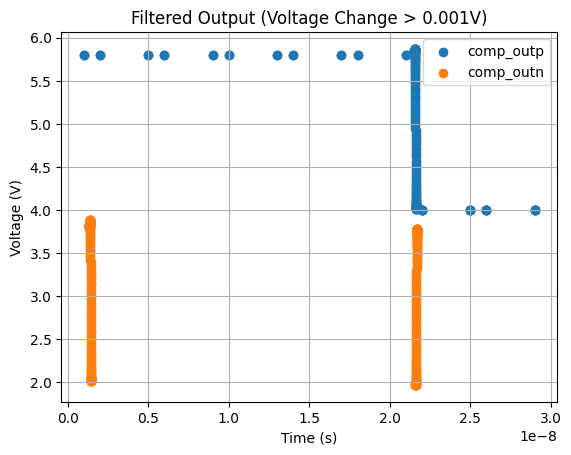

acc_n:  0.00019482666666670312 V
acc_p:  0.002877226666666788 V


In [ ]:
### Code to plot only the desired results

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.lines import Line2D
from matplotlib import cm

##Track changes in a variable called 'output' (e.g., voltage output) from simulation results
comp_outp_voltage = analysis['comp_outp'].data
comp_outn_voltage = analysis['comp_outn'].data
ready_voltage = analysis['ready'].data
time = analysis.time  # simualtion time

threshold = 0.001  ## For example, save data only when the change exceeds 0.001V

## Calculate the difference in output values and select points where the change exceeds the threshold
comp_outp_filtered_time = []
comp_outp_filtered_output = []
for i in range(1, len(comp_outp_voltage)):
    # Calulate difference
    if abs(comp_outp_voltage[i] - comp_outp_voltage[i - 1]) > threshold:
        comp_outp_filtered_time.append(time[i])
        comp_outp_filtered_output.append(comp_outp_voltage[i] + 4)

comp_outn_filtered_time = []
comp_outn_filtered_output = []
for i in range(1, len(comp_outn_voltage)):
    # Calulate difference
    if abs(comp_outn_voltage[i] - comp_outn_voltage[i - 1]) > threshold:
        comp_outn_filtered_time.append(time[i])
        comp_outn_filtered_output.append(comp_outn_voltage[i] + 2)

ready_filtered_time = []
ready_filtered_output = []
for i in range(1, len(ready_voltage)):
    # Calculate difference
    if abs(ready_voltage[i] - ready_voltage[i - 1]) > threshold:
        ready_filtered_time.append(time[i])
        ready_filtered_output.append(ready_voltage[i])

# Ploting fittered data
plt.scatter(comp_outp_filtered_time, comp_outp_filtered_output, label="comp_outp")
plt.scatter(comp_outn_filtered_time, comp_outn_filtered_output, label="comp_outn")
# plt.scatter(ready_filtered_time, ready_filtered_output, label="ready")
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Filtered Output (Voltage Change > 0.001V)')
plt.legend()
plt.grid(True)
plt.show()

# if(len(comp_outn_filtered_time)>0):
#     index = int(comp_outn_filtered_time[int(len(comp_outn_filtered_time)/2)].value)
#     print("acc: ", abs(analysis.cdac_vp[index] - analysis.cdac_vn[index] * 1@u_V))
# if(len(comp_outp_filtered_time)>0):
#     index = int(comp_outp_filtered_time[int(len(comp_outp_filtered_time)/2)].value)
#     print("acc: ", abs(analysis.cdac_vp[index] - analysis.cdac_vn[index] * 1@u_V))

if(len(comp_outn_filtered_time)>0):
    meas_time_n = (comp_outn_filtered_time[int(len(comp_outn_filtered_time)/2)].value)
    index = find_indices(analysis.time, meas_time_n)[0]
    print("acc_n: ", abs(analysis.cdac_vp[index] - analysis.cdac_vn[index] * 1@u_V))
if(len(comp_outp_filtered_time)>0):
    meas_time_p = (comp_outp_filtered_time[int(len(comp_outp_filtered_time)/2)].value)
    index = find_indices(analysis.time, meas_time_p)[0]
    print("acc_p: ", abs(analysis.cdac_vp[index] - analysis.cdac_vn[index] * 1@u_V))

## Transition delay and transition time measurement

In [ ]:
def meas_trans_time(start_time, time_list, signal_A_list, signal_B_list, voltage_A, voltage_B, trans_A_percent, trans_B_percent):
    """
    Measure the transition time between two signals reaching specific percentages of their target voltages.

    Parameters:
        start_time (list): Time points corresponding to signal values.
        signal_A_list (list): Voltage values for signal A.
        signal_B_list (list): Voltage values for signal B.
        voltage_A (float): Target voltage for signal A.
        voltage_B (float): Target voltage for signal B.
        trans_A_percent (float): Percentage of voltage_A for signal A transition point.
        trans_B_percent (float): Percentage of voltage_B for signal B transition point.

    Returns:
        float: The time difference between signal A and signal B reaching their respective percentages.
    """

    start_time_index = (find_indices(time_list, start_time))[0]

    # Calculate target voltages based on percentages
    target_A = voltage_A * (trans_A_percent / 100)
    target_B = voltage_B * (trans_B_percent / 100)

    indexA = 0
    indexB = 0

    # Find the time when signal A reaches the target voltage
    time_A = signal_A_list[-1]
    for t in range(start_time_index, len(signal_A_list)-1):
        if (signal_A_list[t] - target_A) * (signal_A_list[t+1] - target_A) < 0:
            time_A = time_list[t]
            indexA = t
            break
        else:
            if len(signal_A_list) <= t+1:
                raise ValueError("Transition point not found for one or both signals.")

    # Find the time when signal A reaches the target voltage
    time_B = signal_B_list[-1]
    for t in range(start_time_index, len(signal_B_list)-1):
        if (signal_B_list[t] - target_B) * (signal_B_list[t+1] - target_B) < 0:
            time_B = time_list[t]
            indexB = t
            break
        else:
            if len(signal_B_list) <= t+1:
                raise ValueError("Transition point not found for one or both signals.")

    # Calculate and return the time difference
    if time_A is not None and time_B is not None:
        return abs(time_B - time_A), time_A, signal_A_list[indexA], time_B, signal_B_list[indexB]
    else:
        raise ValueError("Transition points not found for one or both signals.")

# Rising Time and Falling Time calculation fuction
def calculate_transition_times(time, signal, low_percentage=10, high_percentage=90, voltage=1.8):
    """
    Calculates the rising and falling times for a signal.
    Works for signals with both rising and falling transitions.

    :param time: List of time points (UnitValue or float)
    :param signal: List of signal values (UnitValue or float)
    :param low_percentage: The lower percentage for rising/falling time (default: 10%)
    :param high_percentage: The higher percentage for rising/falling time (default: 90%)
    :return: List of rising times and falling times
    """
    signal = np.array(signal)
    time = np.array(time)

    # Find min and max signal values
    min_val = np.min(signal)
    max_val = np.max(signal)

    # Calculate the low and high threshold values
    low_threshold = min_val + (max_val - min_val) * (low_percentage / 100)
    high_threshold = min_val + (max_val - min_val) * (high_percentage / 100)

    rising_times = []
    falling_times = []

    # Rising time: Find transitions from low_threshold to high_threshold
    rising_indices = np.where((signal[:-1] < low_threshold) & (signal[1:] >= low_threshold))[0]
    for start_index in rising_indices:
        end_index = np.where((signal[start_index:] >= high_threshold))[0]
        if len(end_index) > 0:
            rising_time = time[start_index + end_index[0]] - time[start_index]
            rising_times.append(rising_time)

    # Falling time: Find transitions from high_threshold to low_threshold
    falling_indices = np.where((signal[:-1] > high_threshold) & (signal[1:] <= high_threshold))[0]
    for start_index in falling_indices:
        end_index = np.where((signal[start_index:] <= low_threshold))[0]
        if len(end_index) > 0:
            falling_time = time[start_index + end_index[0]] - time[start_index]
            falling_times.append(falling_time)

    return rising_times, falling_times

time interval: 0.10000000000003068 ps
1.0000000000003067e-13 s

========= Transition Delay =========
Transition_n Delay: 0.6479000000007327 ns
Transition_p Delay: 0.597900000000676 ns

========= Transition Time =========
CLK Rising Time: [1.0000000000001e-12, 9.000000000006897e-13, 9.999999999994796e-13, 9.000000000006897e-13, 9.999999999978252e-13, 9.00000000002344e-13, 9.000000000056527e-13, 9.00000000002344e-13]
CLK Falling Time: [8.999999999998625e-13, 9.000000000006897e-13, 9.999999999994796e-13, 9.999999999994796e-13, 9.00000000002344e-13, 9.00000000002344e-13, 9.00000000002344e-13]
P Rising Time: []
P Falling Time: [4.800000000005443e-11]
N Rising Time: [5.800000000006577e-11]
N Falling Time: [4.30000000000043e-11]

========= Plot =========


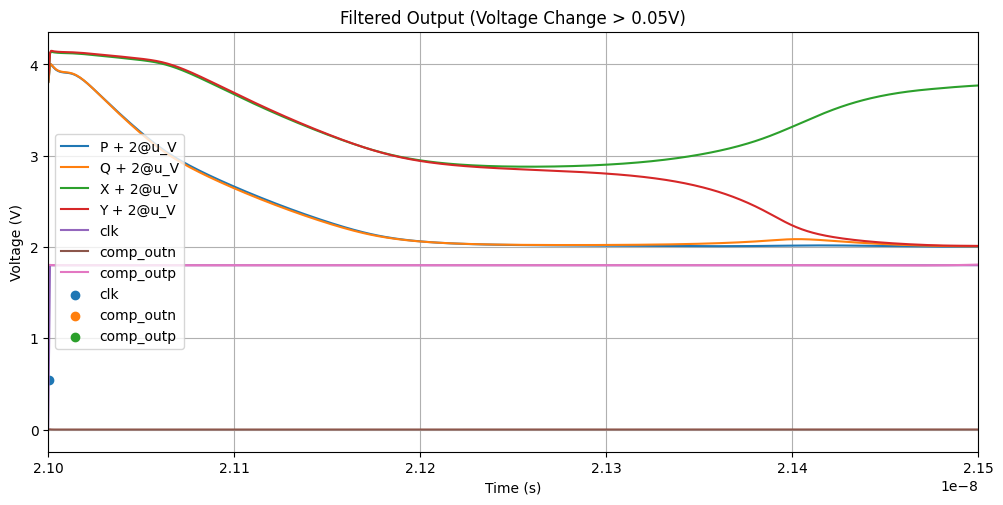

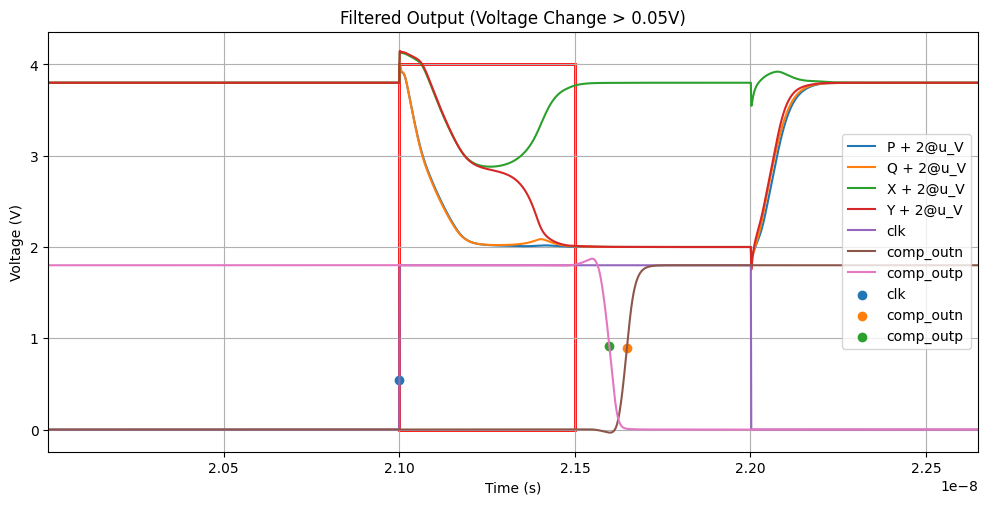

In [ ]:
print(f"time interval: {(analysis.time[1]-analysis.time[0]) * 1@u_ps}")
print(analysis.time[1]-analysis.time[0])

start_time = 20@u_ns
time_diff = (start_time - 1@u_ns)
index_diff = time_diff / (analysis.time[1] - analysis.time[0])
index = round(index_diff.value / 10 + (index_diff/10000*3))  # index 오차 보정
temp_time = analysis.time[index]

print(f"\r\n========= Transition Delay =========")

transition_time, signalA_time, signalA_val, signalB_time, signalB_val = meas_trans_time(temp_time, analysis.time, analysis['clk'].data, analysis['comp_outn'].data, 1.8, 1.8, 50, 50)
print(f"Transition_n Delay: {transition_time * 1@u_ns}")

transition_time_2, signalA_time_2, signalA_val_2, signalC_time, signalC_val = meas_trans_time(temp_time, analysis.time, analysis['clk'].data, analysis['comp_outp'].data, 1.8, 1.8, 50, 50)
print(f"Transition_p Delay: {transition_time_2 * 1@u_ns}")

print(f"\r\n========= Transition Time =========")

rising_time, falling_time = calculate_transition_times(analysis.time, analysis['clk'].data)
print(f"CLK Rising Time: {rising_time}")
print(f"CLK Falling Time: {falling_time}")

rising_time, falling_time = calculate_transition_times(analysis.time, analysis['comp_outp'].data)
print(f"P Rising Time: {rising_time}")
print(f"P Falling Time: {falling_time}")

rising_time, falling_time = calculate_transition_times(analysis.time, analysis['comp_outn'].data)
print(f"N Rising Time: {rising_time}")
print(f"N Falling Time: {falling_time}")

print(f"\r\n========= Plot =========")

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)

plt.plot(analysis.time, analysis.P + 2@u_V, label='P + 2@u_V')
plt.plot(analysis.time, analysis.Q + 2@u_V, label='Q + 2@u_V')
plt.plot(analysis.time, analysis.X + 2@u_V, label='X + 2@u_V')
plt.plot(analysis.time, analysis.Y + 2@u_V, label='Y + 2@u_V')
plt.plot(analysis.time, analysis.clk, label="clk")
plt.plot(analysis.time, analysis.comp_outn, label="comp_outn")
plt.plot(analysis.time, analysis.comp_outp, label="comp_outp")
plt.scatter(signalA_time, signalA_val, label="clk")
plt.scatter(signalB_time, signalB_val, label="comp_outn")
plt.scatter(signalC_time, signalC_val, label="comp_outp")
# plt.scatter(ready_filtered_time, ready_filtered_output, label="ready")
plt.xlim(21e-9, 21.5e-9)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Filtered Output (Voltage Change > 0.05V)')
plt.legend()
plt.grid(True)
plt.show()

##############

import matplotlib.patches as patches

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 2)

red_box = patches.Rectangle((21e-9, -0.5e-9), 0.5e-9, 4,linewidth=2, edgecolor='red', facecolor='none')

plt.gca().add_patch(red_box)

plt.plot(analysis.time, analysis.P + 2@u_V, label='P + 2@u_V')
plt.plot(analysis.time, analysis.Q + 2@u_V, label='Q + 2@u_V')
plt.plot(analysis.time, analysis.X + 2@u_V, label='X + 2@u_V')
plt.plot(analysis.time, analysis.Y + 2@u_V, label='Y + 2@u_V')

plt.plot(analysis.time, analysis.clk, label="clk")
plt.plot(analysis.time, analysis.comp_outn, label="comp_outn")
plt.plot(analysis.time, analysis.comp_outp, label="comp_outp")
plt.scatter(signalA_time, signalA_val, label="clk")
plt.scatter(signalB_time, signalB_val, label="comp_outn")
plt.scatter(signalC_time, signalC_val, label="comp_outp")
# plt.scatter(ready_filtered_time, ready_filtered_output, label="ready")
if signalA_time <= signalB_time:
  plt.xlim((signalA_time-1@u_ns).value, (signalB_time+1@u_ns).value)
else:
  plt.xlim((signalA_time-1@u_ns).value, (signalB_time+1@u_ns).value)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Filtered Output (Voltage Change > 0.05V)')
plt.legend()
plt.grid(True)
plt.show()

# Results


========== ff, 1.98V ==========
.title HGU_Comparator
.include /content/hgu_goss/hgu/spice/hgu_comp_flat_RC.spice
.lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice ff
X1 ready cdac_vn comp_outp comp_outn cdac_vp clk VDD VSS P Q X Y hgu_comp
V1 VDD VSS 1.98
V2 VSS 0 0
C1 comp_outp VSS 0.005pF
C2 comp_outn VSS 0.005pF
Vclk clk 0 DC 0V PULSE(0V 1.98V 0ps 100ps 100ps 5ns 20ns)
V3 Vbiasp 0 0.9934999999999999
V4 Vbiasn 0 0.9865
Vcdac_vp cdac_vp Vbiasp DC 0V PULSE(0V -0.007V 0ns 5ps 5ps 25ns 50ns)
Vcdac_vn cdac_vn Vbiasn DC 0V PULSE(0V 0.007V 0ns 5ps 5ps 25ns 50ns)

done


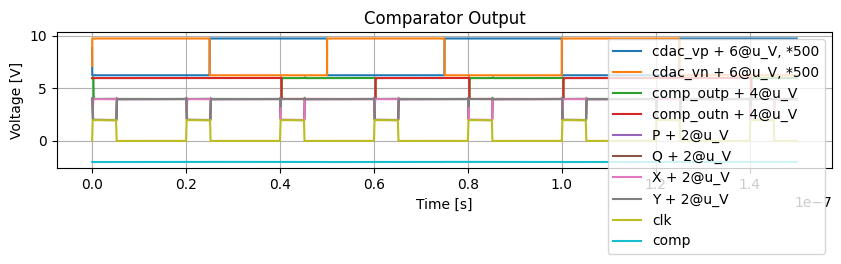

========= Transition Delay =========
Transition_n Delay: 20.25300000000017 ns
Transition_p Delay: 20.293000000000216 ns
========= Transition Time =========
CLK Rising Time: [6.100000000000001e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11]
CLK Falling Time: [6.100000000001871e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11]
P Rising Time: [4.900000000005556e-11, 4.900000000005556e-11, 4.900000000005556e-11]
P Falling Time: [3.2999999999999886e-11, 3.900000000004422e-11, 4.000000000004536e-11]
N Rising Time: [3.900000000004422e-11, 4.000000000004536e-11]
N Falling Time: [3.100000000003515e-11, 3.100000000003515e-11, 3.100000000003515e-11]


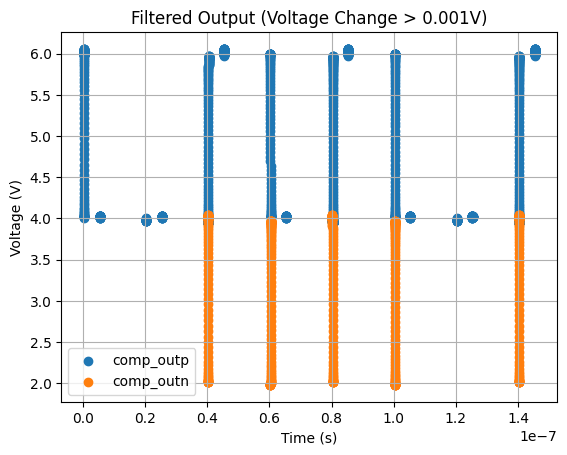

meas_time_n:  8.028850000000021e-08
acc_n:  0.006999999999999895 V
meas_time_p:  8.030350000000023e-08
acc_p:  0.006999999999999895 V

========== tt, 1.80V ==========
.title HGU_Comparator
.include /content/hgu_goss/hgu/spice/hgu_comp_flat_RC.spice
.lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt
X1 ready cdac_vn comp_outp comp_outn cdac_vp clk VDD VSS P Q X Y hgu_comp
V1 VDD VSS 1.8
V2 VSS 0 0
C1 comp_outp VSS 0.005pF
C2 comp_outn VSS 0.005pF
Vclk clk 0 DC 0V PULSE(0V 1.8V 0ps 100ps 100ps 5ns 20ns)
V3 Vbiasp 0 0.9035
V4 Vbiasn 0 0.8965000000000001
Vcdac_vp cdac_vp Vbiasp DC 0V PULSE(0V -0.007V 0ns 5ps 5ps 25ns 50ns)
Vcdac_vn cdac_vn Vbiasn DC 0V PULSE(0V 0.007V 0ns 5ps 5ps 25ns 50ns)

done


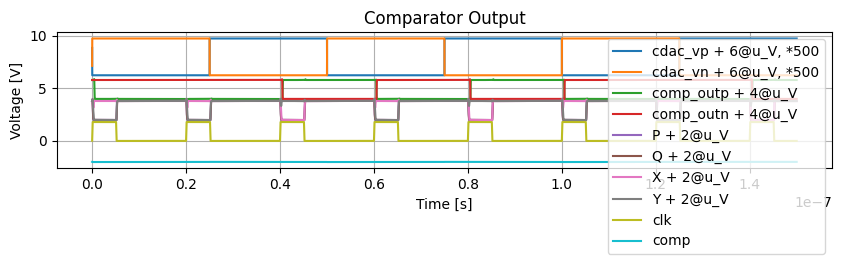

========= Transition Delay =========
Transition_n Delay: 20.450000000000394 ns
Transition_p Delay: 20.51100000000046 ns
========= Transition Time =========
CLK Rising Time: [6.100000000000001e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11]
CLK Falling Time: [6.100000000001871e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11]
P Rising Time: [7.000000000007937e-11, 7.000000000007937e-11, 7.000000000007937e-11]
P Falling Time: [4.599999999999984e-11, 5.7000000000064633e-11, 5.60000000000635e-11]
N Rising Time: [5.7000000000064633e-11, 5.7000000000064633e-11]
N Falling Time: [4.400000000004989e-11, 4.400000000004989e-11, 4.400000000004989e-11]


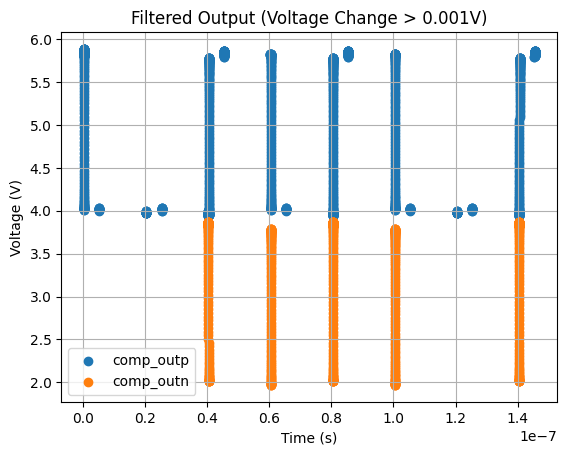

meas_time_n:  8.048050000000043e-08
acc_n:  0.007000000000000006 V
meas_time_p:  8.050750000000046e-08
acc_p:  0.007000000000000006 V

========== ss, 1.62V ==========
.title HGU_Comparator
.include /content/hgu_goss/hgu/spice/hgu_comp_flat_RC.spice
.lib /usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice ss
X1 ready cdac_vn comp_outp comp_outn cdac_vp clk VDD VSS P Q X Y hgu_comp
V1 VDD VSS 1.62
V2 VSS 0 0
C1 comp_outp VSS 0.005pF
C2 comp_outn VSS 0.005pF
Vclk clk 0 DC 0V PULSE(0V 1.62V 0ps 100ps 100ps 5ns 20ns)
V3 Vbiasp 0 0.8135
V4 Vbiasn 0 0.8065000000000001
Vcdac_vp cdac_vp Vbiasp DC 0V PULSE(0V -0.007V 0ns 5ps 5ps 25ns 50ns)
Vcdac_vn cdac_vn Vbiasn DC 0V PULSE(0V 0.007V 0ns 5ps 5ps 25ns 50ns)

done


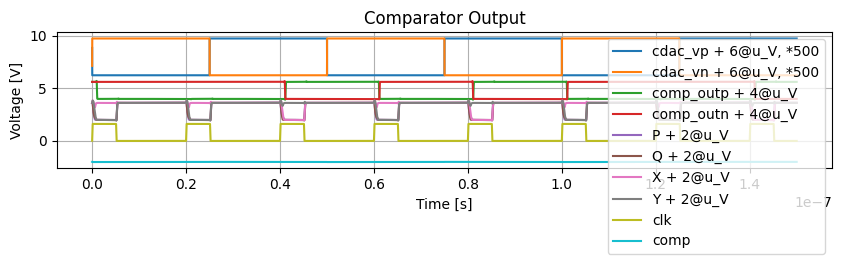

========= Transition Delay =========
Transition_n Delay: 21.02100000000104 ns
Transition_p Delay: 21.12600000000116 ns
========= Transition Time =========
CLK Rising Time: [6.100000000000001e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11]
CLK Falling Time: [6.100000000001871e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11, 6.100000000006917e-11]
P Rising Time: [1.1900000000013494e-10, 1.1900000000013494e-10, 1.1900000000013494e-10]
P Falling Time: [8.20000000000082e-11, 1.0200000000011566e-10, 1.0200000000011566e-10]
N Rising Time: [9.800000000011112e-11, 9.800000000011112e-11]
N Falling Time: [7.800000000008845e-11, 7.800000000008845e-11, 7.800000000008845e-11]


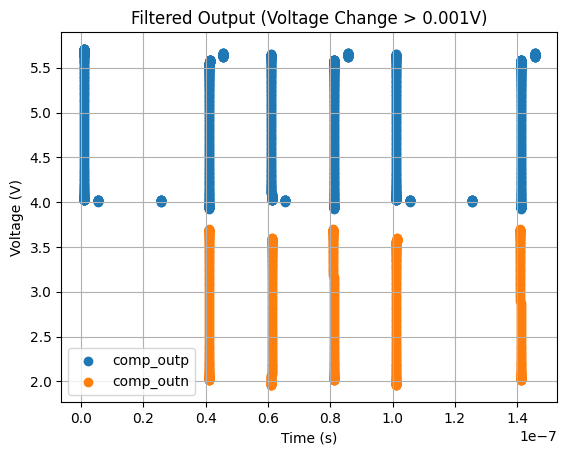

meas_time_n:  8.106350000000109e-08
acc_n:  0.006999999999999895 V
meas_time_p:  6.558550000000044e-08
acc_p:  0.007000000000000117 V


In [ ]:
## Importing the SPICE file of an externally designed component for simulation

from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *
import matplotlib.pyplot as plt

for loop_index in range(1,4):
  circuit = Circuit('HGU_Comparator')
  if loop_index == 1:
    print("\r\n========== ff, 1.98V ==========")
    circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'ff')
    opVoltage = 1.98
    opTemp = 0
  elif loop_index == 2:
    print("\r\n========== tt, 1.80V ==========")
    circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'tt')
    opVoltage = 1.8
    opTemp = 25
  elif loop_index == 3:
    print("\r\n========== ss, 1.62V ==========")
    circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'ss')
    opVoltage = 1.62
    opTemp = 100

  circuit.include('hgu_comp_flat_RC.spice')

  circuit.X(1, 'hgu_comp', 'ready', 'cdac_vn', 'comp_outp', 'comp_outn', 'cdac_vp', 'clk', 'VDD', 'VSS', 'P', 'Q', 'X', 'Y')

  # Define the voltage sources
  circuit.V(1, 'VDD', 'VSS', opVoltage)
  circuit.V(2, 'VSS', 0, 0)

  circuit.C(1, 'comp_outp', 'VSS', 0.005@u_pF)  # 5 fF capacitor
  circuit.C(2, 'comp_outn', 'VSS', 0.005@u_pF)  # 5 fF capacitor

  circuit.PulseVoltageSource('clk', 'clk', 0,
                            initial_value=0@u_V, pulsed_value=(opVoltage * 1@u_V),
                            rise_time=100@u_ps, fall_time=100@u_ps,
                            pulse_width=5@u_ns, period=20@u_ns, delay_time=0@u_ps)

  # pulse input source # initial_value != 0 => err
  circuit.V(3, 'Vbiasp', 0, opVoltage/2 + 0.0035)
  circuit.V(4, 'Vbiasn', 0, opVoltage/2 - 0.0035)
  circuit.PulseVoltageSource('cdac_vp', 'cdac_vp','Vbiasp',
                             initial_value=0@u_V, pulsed_value=-0.007@u_V,
                             rise_time=5@u_ps, fall_time=5@u_ps,
                             pulse_width=25@u_ns, period=50@u_ns, delay_time=0@u_ns)
  circuit.PulseVoltageSource('cdac_vn', 'cdac_vn','Vbiasn',
                             initial_value=0@u_V, pulsed_value=0.007@u_V,
                             rise_time=5@u_ps, fall_time=5@u_ps,
                             pulse_width=25@u_ns, period=50@u_ns, delay_time=0@u_ns)

  print(str(circuit))

  # Run transient simulation
  simulator = circuit.simulator(temperature=opTemp, nominal_temperature=25)
  analysis = simulator.transient(start_time=1@u_ps, step_time=1@u_ps, end_time=150@u_ns)

  print ('done')

  # Plot the output
  plt.figure(figsize=(10, 6))
  plt.subplot(3, 1, loop_index)
  plt.plot(analysis.time, ((analysis.cdac_vp-(opVoltage/2*1@u_V))*500) + 8@u_V, label='cdac_vp + 6@u_V, *500')
  plt.plot(analysis.time, ((analysis.cdac_vn-(opVoltage/2*1@u_V))*500) + 8@u_V, label='cdac_vn + 6@u_V, *500')
  plt.plot(analysis.time, analysis.comp_outp + 4@u_V, label='comp_outp + 4@u_V')
  plt.plot(analysis.time, analysis.comp_outn + 4@u_V, label='comp_outn + 4@u_V')
  plt.plot(analysis.time, analysis.P + 2@u_V, label='P + 2@u_V')
  plt.plot(analysis.time, analysis.Q + 2@u_V, label='Q + 2@u_V')
  plt.plot(analysis.time, analysis.X + 2@u_V, label='X + 2@u_V')
  plt.plot(analysis.time, analysis.Y + 2@u_V, label='Y + 2@u_V')
  plt.plot(analysis.time, analysis.clk, label='clk')
  plt.plot(analysis.time, analysis.cdac_vp - analysis.cdac_vn - 2@u_V, label='comp')
  plt.title('Comparator Output')
  plt.xlabel('Time [s]')
  plt.ylabel('Voltage [V]')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.show()

  #####################

  start_time = 20@u_ns
  time_diff = (start_time - 1@u_ns)
  index_diff = time_diff / (analysis.time[1] - analysis.time[0])
  index = round(index_diff.value / 10 + (index_diff/10000*3))
  temp_time = start_time #analysis.time[index]

  print(f"========= Transition Delay =========")

  transition_time, signalA_time, signalA_val, signalB_time, signalB_val = meas_trans_time(temp_time, analysis.time, analysis['clk'].data, analysis['comp_outn'].data, opVoltage, opVoltage, 50, 50)
  print(f"Transition_n Delay: {transition_time * 1@u_ns}")

  transition_time_2, signalA_time_2, signalA_val_2, signalC_time, signalC_val = meas_trans_time(temp_time, analysis.time, analysis['clk'].data, analysis['comp_outp'].data, opVoltage, opVoltage, 50, 50)
  print(f"Transition_p Delay: {transition_time_2 * 1@u_ns}")

  print(f"========= Transition Time =========")

  import numpy as np
  import matplotlib.pyplot as plt
  import matplotlib.ticker as ticker
  import matplotlib
  from matplotlib import pyplot as plt
  from matplotlib.pyplot import figure
  from matplotlib.lines import Line2D
  from matplotlib import cm

  rising_time, falling_time = calculate_transition_times(analysis.time, analysis['clk'].data, 20, 80, opVoltage)
  print(f"CLK Rising Time: {rising_time}")
  print(f"CLK Falling Time: {falling_time}")

  rising_time, falling_time = calculate_transition_times(analysis.time, analysis['comp_outp'].data, 10, 90, opVoltage)
  print(f"P Rising Time: {rising_time}")
  print(f"P Falling Time: {falling_time}")

  rising_time, falling_time = calculate_transition_times(analysis.time, analysis['comp_outn'].data, 10, 90, opVoltage)
  print(f"N Rising Time: {rising_time}")
  print(f"N Falling Time: {falling_time}")

  ###################

  ##Track changes in a variable called 'output' (e.g., voltage output) from simulation results
  comp_outp_voltage = analysis['comp_outp'].data
  comp_outn_voltage = analysis['comp_outn'].data
  ready_voltage = analysis['ready'].data
  time = analysis.time  # simualtion time

  threshold = 0.001  ## For example, save data only when the change exceeds 0.001V

  ## Calculate the difference in output values and select points where the change exceeds the threshold
  comp_outp_filtered_time = []
  comp_outp_filtered_output = []
  for i in range(1, len(comp_outp_voltage)):
      # Calulate difference
      if abs(comp_outp_voltage[i] - comp_outp_voltage[i - 1]) > threshold:
          comp_outp_filtered_time.append(time[i])
          comp_outp_filtered_output.append(comp_outp_voltage[i] + 4)

  comp_outn_filtered_time = []
  comp_outn_filtered_output = []
  for i in range(1, len(comp_outn_voltage)):
      # Calulate difference
      if abs(comp_outn_voltage[i] - comp_outn_voltage[i - 1]) > threshold:
          comp_outn_filtered_time.append(time[i])
          comp_outn_filtered_output.append(comp_outn_voltage[i] + 2)

  ready_filtered_time = []
  ready_filtered_output = []
  for i in range(1, len(ready_voltage)):
      # Calculate difference
      if abs(ready_voltage[i] - ready_voltage[i - 1]) > threshold:
          ready_filtered_time.append(time[i])
          ready_filtered_output.append(ready_voltage[i])

  # Ploting fittered data
  plt.scatter(comp_outp_filtered_time, comp_outp_filtered_output, label="comp_outp")
  plt.scatter(comp_outn_filtered_time, comp_outn_filtered_output, label="comp_outn")
  # plt.scatter(ready_filtered_time, ready_filtered_output, label="ready")
  plt.xlabel('Time (s)')
  plt.ylabel('Voltage (V)')
  plt.title('Filtered Output (Voltage Change > 0.001V)')
  plt.legend()
  plt.grid(True)
  plt.show()

  if(len(comp_outn_filtered_time)>0):
      meas_time_n = (comp_outn_filtered_time[int(len(comp_outn_filtered_time)/2)].value)
      index = find_indices(analysis.time, meas_time_n)[0]
      print("meas_time_n: ", meas_time_n)
      print("acc_n: ", abs(analysis.cdac_vp[index] - analysis.cdac_vn[index] * 1@u_V))
  if(len(comp_outp_filtered_time)>0):
      meas_time_p = (comp_outp_filtered_time[int(len(comp_outp_filtered_time)/2)].value)
      index = find_indices(analysis.time, meas_time_p)[0]
      print("meas_time_p: ", meas_time_p)
      print("acc_p: ", abs(analysis.cdac_vp[index] - analysis.cdac_vn[index] * 1@u_V))


|conner test|SS, 1.62V, 100deg|TT, 1.80V, 25deg|FF, 1.98V, 0deg|
|:--:|:----------:|:----------:|:----------:|
|Rising Time  |119ps|70ps|49ps|
|Falling Time |102ps|57ps|40ps|
|Rising Delay |21.02ns|20.45ns|20.25ns|
|Falling Delay|21.12ns|20.51ns|20.29ns|

# References


[1] Moser, & Manuel. (2023). Design of a Low-Power 12-Bit Non-Binary Charge-Redistributionpp SAR-ADC Utilizing the SKY130 Open-Source Technology. JKU. https://epub.jku.at/urn/urn:nbn:at:at-ubl:1-62352

[2] Razavi, Behzad. (2021). The Design of a Comparator [The Analog Mind]. IEEE Solid-State Circuits Magazine. 12. 8-14. 10.1109/MSSC.2020.3021865.

[3] SkyWater SKY130 PDK. available online at https://github.com/google/skywater-pdk.

[4] Ngspice Circuit Simulator, avalable online at: http://www.ngspice.org.

[5] HGU_goss dedign Github, avalable online at https://github.com/midolls/hgu_goss.git